# Quantum Circuit Mastermind

This game lets the players deduce which qubits have started out as 0 and 1 based on the circuit diagram and the result of a single calculation.

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.ibmq import least_busy
from qiskit import ClassicalRegister, QuantumRegister

#import math stuff
import math
import numpy as np
import random

#import the library for generating random circuits
import qiskit.ignis.verification.randomized_benchmarking as rb

#Import general libraries (needed for functions)
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

You can change the number of qubits to adjust the difficulty of the game.

In [2]:
#Number of qubits 1-5, more is harder and default is 5.
nQ = 5

Next we generate a random circuit and show you the diagram.

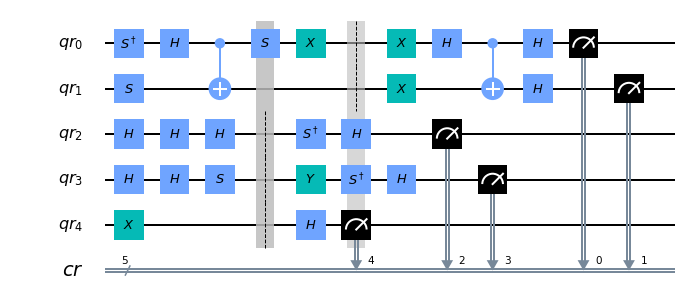

In [4]:
nseeds = 1
nCliffs = np.arange(1,300,10)
rb_pattern = [[0,1],[2],[3,4]]
length_multiplier = [1,2,1]
align_cliffs=True

rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['align_cliffs'] = align_cliffs
rb_opts['length_multiplier'] = length_multiplier
rb_circs, xdata = rb.randomized_benchmarking_seq(**rb_opts)

qc_puzzle = qiskit.QuantumCircuit(*rb_circs[0][0].qregs,*rb_circs[0][0].cregs)
x = 0
for i in rb_circs[0][0][0:-nQ]:
    x = x+1
    if x % 3 != 0:
        qc_puzzle.data.append(i)
qc_puzzle.measure(*rb_circs[0][0].qregs,*rb_circs[0][0].cregs)
qc_puzzle.draw()

We generate the solution of the challenge.

In [6]:
qc = qiskit.QuantumCircuit(*rb_circs[0][0].qregs,*rb_circs[0][0].cregs)
turn = 0
ans = []
for i in range(0,5):
    if random.random() > 0.5:
        qc.x(i)
        ans.append(1)
    else:
        ans.append(0)
    qc.barrier(i)
for i in qc_puzzle.data:
    qc.data.append(i)

Now we are ready to run the calculation once and show you the result.

In [7]:
backend = least_busy(IBMQ.get_provider().backends(simulator=True))
job_exp = execute(qc, backend=backend, shots=1, max_credits=3)
job_exp.result().get_counts(qc)

{'10111': 1}

Now you've seen the circuit and the result. Please give the starting values of the qubits. 

Each player has his own row and the number of qubits needs to match what you selected in the beginning.

The program will tell which player was correct, and if they weren't, how many qubits they got wrong.

You can change your answers and have another round by re-running this code block.

In [1]:
#Two Players and Five Qubits is the default
guesses = [[1, 1, 0, 1, 1], #Player 1
           [0, 0, 0, 0, 1]] #Player 2

p = 0
turn = turn + 1
print("Turn ", turn, " starting...")
for g in guesses:
    p = p + 1
    z = 0
    if g == ans:
        print("Hooray! Player ", p, " is correct.")
    else:
        for x in range(0,nQ):
            z = z + abs(ans[x] - g[x])
        print("Player ", p, " got ", z, " qubits wrong.")

NameError: name 'turn' is not defined

Let us finally look at the whole circuit with the X gates that set the initial conditions that were to be guessed and print out the answer in plain.

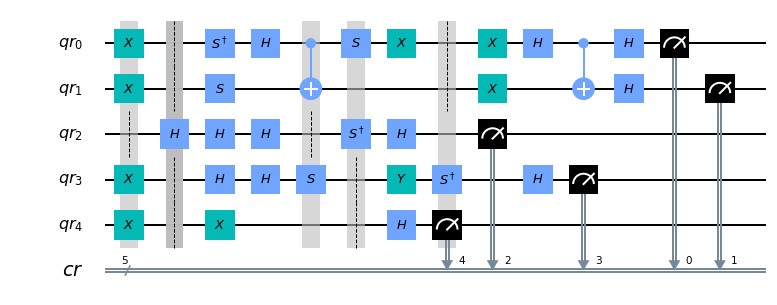

In [19]:
qc.draw()

In [21]:
ans

[1, 1, 0, 1, 1]